<a href="https://colab.research.google.com/github/imanadeko/Clustering-Antartica-Penguin-Species/blob/main/Clustering_Antartica_Penguin_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering**

I began by importing the necessary libraries and reading in the data as a pandas DataFrame called `penguins_df`, then investigated and cleaned the dataset by removing null values and outliers. I saved the cleaned DataFrame as `penguins_clean`.

In [ ]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

penguins_df = pd.read_csv('/content/drive/MyDrive/penguins.csv')

In [ ]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Examine dataframe for missing values
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
# Dealing with missing values
penguins_clean = penguins_df.dropna()
penguins_clean.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# Check for outliers
penguins_clean.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


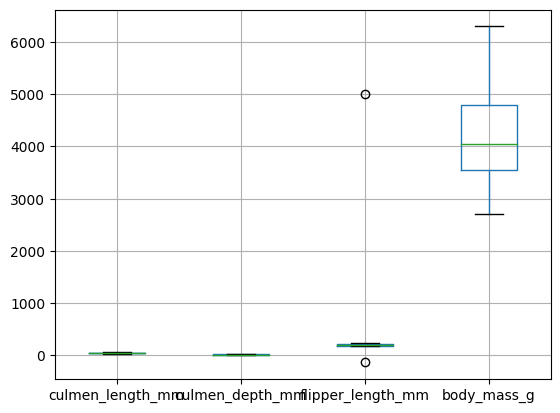

In [ ]:
# Visualize the dataset with a boxplot to view outliers
penguins_clean.boxplot()
plt.show()

In [ ]:
# Filter out values for flipper length that are less than 0 or greater than 3000
penguins_clean = penguins_clean.query('flipper_length_mm > 0 & flipper_length_mm < 3000')

I created dummy variables with the cleaned dataset and removed the original categorical feature, `sex`, from the dataset.
I scaled the data using the standard scaling method and saved it as a new dataframe `penguins_preprocessed`.

In [ ]:
# Create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.', axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [ ]:
# Scale data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns = df.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


I performed Princpal Component Analysis (PCA) on `penguins_processed` to determune the desired number of components. I considered any component with an explained variance ratio above 10% as a suitable component.
I saved the number of components as a variable called `n_components`.

In [ ]:
# Perform PCA
pca = PCA(n_components = None)
df_pca = pca.fit(penguins_preprocessed)
df_pca.explained_variance_ratio_

n_components = sum(df_pca.explained_variance_ratio_ > 0.1)
n_components

2

I executed PCA using `n_components` and stored the result as `penguins_PCA`.

In [ ]:
pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

I employed k-means clustering on `penguins_PCA`, setting `random_state=2`, to determine the number of clusters through elbow analysis. I saved the optimal number of clusters in a variable called `n_cluster`.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

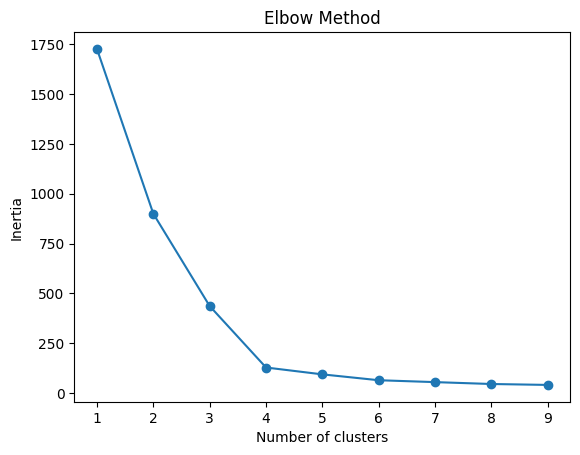

In [ ]:
# To get the optimal number of clusters for K-Means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans = kmeans.fit(penguins_PCA)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
n_cluster = 4

I created a new k-means cluster model, setting `n_clusters=n_cluster`, saving the model as a variable calles `kmeans`.
I visualized the clusters using the first two principal components.

In [ ]:
# Create and fit a new k-means cluster with n_cluster
kmeans = KMeans(n_clusters=n_cluster, random_state=2).fit(penguins_PCA)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


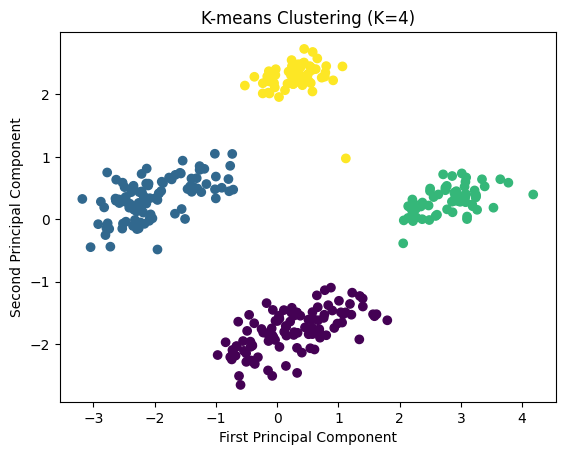

In [ ]:
# Visualize the clusters using the first two principal components
plt.scatter(penguins_PCA[:, 0],
            penguins_PCA[:, 1],
            c=kmeans.labels_,
            cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering (K={})'.format(n_cluster))
plt.show()